# Finite-difference method: iterative technique

## Laplace equation:

$$\nabla^2u=0$$

where $u(x,y)$.

$$\frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}=0$$


## Problem:

Solve the 2D Laplace equation considering the following domain:

$0\leq x \leq a=6\pi$

$0\leq y \leq b=\pi$

and the following boundary conditions:

$u(0,y)=0$

$u(a,y)=\frac{\sinh{(\omega y})}{\sinh{(\omega b})}$

$u(x,0)=0$

$u(x,b)=\frac{\sin{(\omega x})}{\sin{(\omega a})}$


## 1. Analytical solution

$$\frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}=0$$

We use variable separation:

$u(x,y)=\theta(x)\,\phi(y)$

We obtain:

$$\phi\frac{\partial^2\theta}{\partial x^2}+\theta\frac{\partial^2\phi}{\partial y^2}=0$$

$$\Rightarrow \frac{1}{\theta}\frac{\partial^2\theta}{\partial x^2}=-\frac{1}{\phi}\frac{\partial^2\phi}{\partial y^2}=\alpha$$

Our resulting ODEs are:

$\theta_{xx} -\alpha \theta=0$

$\phi_{yy} +\alpha \phi=0$


### Case 1:

If $\alpha=0$,

$\theta=c_1x+c_2$

$\phi=c_3y+c_4$

### Case 2:

If $\alpha\neq0$, and $\alpha<0$:

$\theta=c_1e^{i\sqrt{-\alpha}x}+c_2e^{-i\sqrt{-\alpha}x}$

$\phi=c_1e^{\sqrt{-\alpha}y}+c_2e^{-\sqrt{-\alpha}y}$

If $\alpha\neq0$, and $\alpha>0$:

$\theta=c_1e^{\sqrt{-\alpha}x}+c_2e^{-\sqrt{-\alpha}x}$

$\phi=c_1e^{i\sqrt{-\alpha}y}+c_2e^{-i\sqrt{-\alpha}y}$

We introduce $\omega=\sqrt{-\alpha}$:

$\theta=c_1e^{i\sqrt{\omega}x}+c_2e^{-i\sqrt{\omega}x}$

$\phi=c_1e^{\sqrt{\omega}y}+c_2e^{-\sqrt{\omega}y}$

If $\alpha\neq0$, and $\alpha>0$:

$\theta=c_1e^{\sqrt{\omega}x}+c_2e^{-\sqrt{\omega}x}$

$\phi=c_1e^{i\sqrt{\omega}y}+c_2e^{-i\sqrt{\omega}y}$

## Solution for $\theta(x)$:

$\theta(x)=\left\{
\begin{array}{ll}
      A\cos(\omega x) + B\sin(\omega x) & \alpha< 0 \\
      C\,x+D & \alpha =0 \\
      E\cosh(\omega x) + F\sinh(\omega x) & \alpha> 0 \\
\end{array} 
\right.$

## Solution for $\phi(y)$:

$\phi(y)=\left\{
\begin{array}{ll}
      A\cosh(\omega y) + B\sinh(\omega y) & \alpha< 0 \\
      C\,y+D & \alpha =0 \\
      E\cos(\omega y) + F\sin(\omega y) & \alpha> 0 \\
\end{array} 
\right.$


## Boundary condition analysis:

### 1. $u(0,y)=0$

$$\Rightarrow \theta(0)=0$$


### 2. $u(a,y)=\frac{\sinh{(\omega y})}{\sinh{(\omega b})}$

$$\Rightarrow \theta(a)=1$$
$$\Rightarrow \phi(y)=\frac{\sinh{(\omega y})}{\sinh{(\omega b})}$$

### 3. $u(x,0)=0$

$$\Rightarrow \phi(0)=0$$

### 4. $u(x,b)=\frac{\sin{(\omega x})}{\sin{(\omega a})}$

$$\Rightarrow \theta(x)=\frac{\sin{(\omega x})}{\sin{(\omega a})}$$
$$\Rightarrow \phi(b)=1$$


## Solution after applying BCs:

$$u(x,y)=\theta(x)\phi(y)=\frac{\sin(\omega x)}{\sin(\omega a)}\frac{\sinh(\omega y)}{\sinh(\omega b)}$$

### Plotting the exact analytical solution:

In [21]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Computational domain limits
a = 6*np.pi # for x 
b = np.pi   # for y

# Step sizes
nx = 200
ny = 100

# Differentials for x and y
dx = a/nx 
dy = b/ny

# Generate the vectors for x and y
x = np.arange(0, a, dx)
y = np.arange(0, b, dy)

#print(x.shape, y.shape)

(200,) (100,)


In [23]:
# Meshgrid - 2D computational domain

x_2d, y_2d = np.meshgrid(x, y)

#print(x_2d.shape, y_2d.shape)

### Exact solution

$$u(x,y)=\theta(x)\phi(y)=\frac{\sin(\omega x)}{\sin(\omega a)}\frac{\sinh(\omega y)}{\sinh(\omega b)}$$

For simplicity, we take: 
$\omega = 1$

In [24]:
def u_exact(xx, yy):
    """
    Function to evaluate the exact sln to the Laplace eq. for th
    given problem.
    Inputs: xx -> x_2d, yy ->  y_2d
    Ouput: surface for u(x,y)
    """
    
    u_sln = (np.sin(xx)/np.sin(a))*(np.sinh(yy)/np.sinh(b))
    
    return u_sln

In [25]:
# Evaluate using our meshgrid

u_exact_sln =  u_exact(x_2d, y_2d)

#print(u_exact_sln.shape)

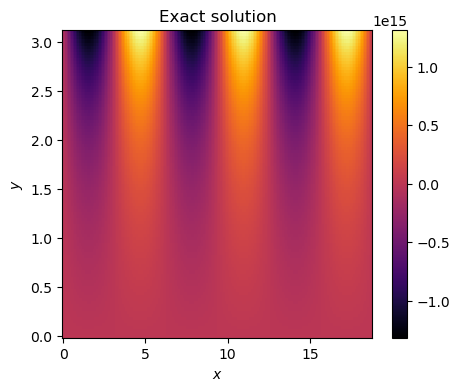

In [27]:
# Plotting

plt.figure(figsize=(5,4))

z1 = plt.pcolor(x_2d, y_2d, u_exact_sln, cmap = 'inferno')

plt.colorbar(z1)

plt.title("Exact solution")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

### 3D plot of the surface:

In [28]:
from mpl_toolkits.mplot3d import Axes3D

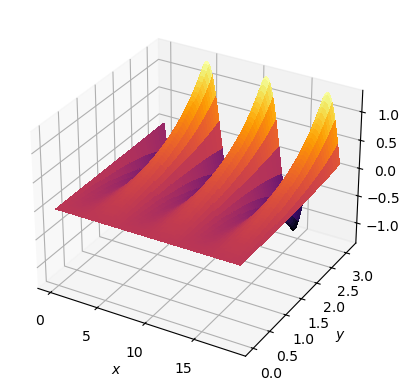

In [29]:
# Plotting
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, u_exact_sln, cmap = 'inferno', linewidth=0, antialiased=False)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

## 2. Numerical solution:

Steps: 

- Discretising the domain: Replace the continuous domain with a grid of points.

- Finite difference approximation: Use a stencil (typically 5-point in 2D or 7-point in 3D) to approximate the Laplace operator at each interior grid point using neighboring values.

- Initial guess: Assign an initial value (e.g., zero or average boundary value) to all interior points.

- Iterative update: Repeatedly update each interior point's value to the average of its neighbors (Gauss-Seidel or Jacobi method).

- Convergence check: Continue iterating until the solution changes less than a small threshold (tolerance) across the grid.


Second derivative in $x$:

$$\frac{\partial^2 u}{\partial x^2}=\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2}$$

Second derivative in $y$:

$$\frac{\partial^2 u}{\partial y^2}=\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2}$$


Placing into the Laplace equation:

$$\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2}=0$$


Working algebraically and solving for the desired point $u_{i,j}$:

$$u_{i,j}=\frac{(\Delta x)^2\,(u_{i,j+1}+u_{i,j-1})+(\Delta y)^2\,(u_{i+1,j}+u_{i-1,j})}{2\,[(\Delta x)^2+(\Delta y)^2]}$$


$$u_{i,j}=\frac{1}{2\,[(\Delta x)^2+(\Delta y)^2]}\left[(\Delta x)^2\,(u_{i,j+1}+u_{i,j-1})+(\Delta y)^2\,(u_{i+1,j}+u_{i-1,j})\right]$$

In [30]:
# Coefficient in front:

coef = 0.5/(dx**2 + dy**2)

#print(coef)

In [31]:
# Empty matrix for the numerical sln

u_numer = np.zeros((ny, nx))

#print(u_numer.shape)

In [32]:
# Boundary conditions

u_numer[0, :] = 0.
u_numer[:, 0] = 0.

u_numer[-1, :] = np.sin(x)/np.sin(a)
u_numer[:, -1] = np.sinh(y)/np.sinh(b)

In [35]:
#print(u_numer)

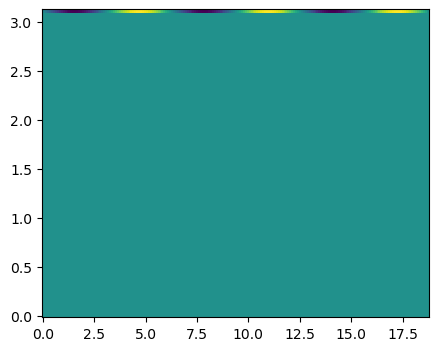

In [40]:
plt.figure(figsize=(5,4))

plt.pcolor(x_2d, y_2d, u_numer, cmap = "viridis")

plt.show()

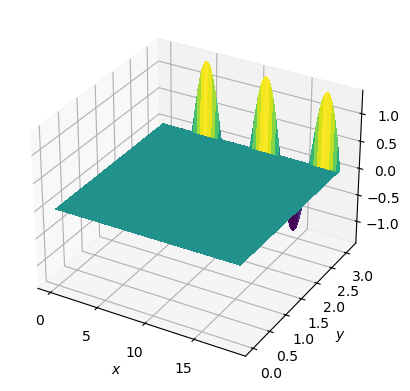

In [41]:
# Plotting
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, u_numer, cmap = 'viridis', linewidth=0, antialiased=False)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

$$u_{i,j}=\frac{1}{2\,[(\Delta x)^2+(\Delta y)^2]}\left[(\Delta x)^2\,(u_{i,j+1}+u_{i,j-1})+(\Delta y)^2\,(u_{i+1,j}+u_{i-1,j})\right]$$

In [42]:
for j in range(1, nx - 1):
    for i in range(1, ny - 1):

        u_numer[i, j] = coef*(dx**2*(u_numer[i+1, j]\
        + u_numer[i-1, j]) + dy**2*(u_numer[i, j+1]\
        + u_numer[i, j-1]))

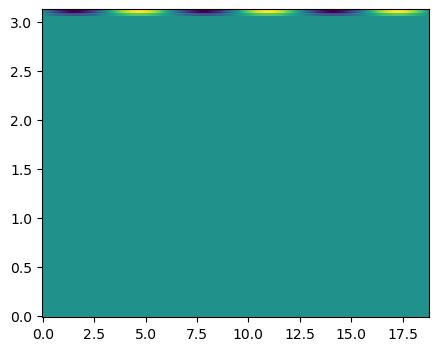

In [43]:
plt.figure(figsize=(5,4))

plt.pcolor(x_2d, y_2d, u_numer, cmap = "viridis")

plt.show()

## Iterative step:

In [52]:
# For loop to fill up the solution

iter_number = 1000

for k in range(iter_number):

    for j in range(1, nx - 1):
        for i in range(1, ny - 1):

            u_numer[i, j] = coef*(dx**2*(u_numer[i+1, j]\
            + u_numer[i-1, j]) + dy**2*(u_numer[i, j+1]\
            + u_numer[i, j-1]))

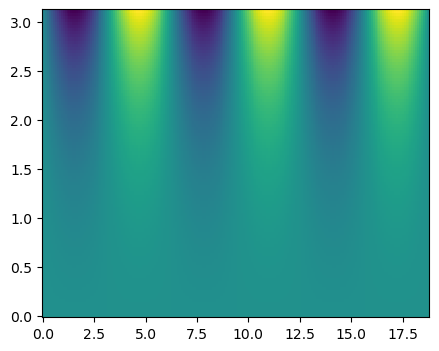

In [54]:
plt.figure(figsize=(5,4))

plt.pcolor(x_2d, y_2d, u_numer, cmap = "viridis")

plt.show()

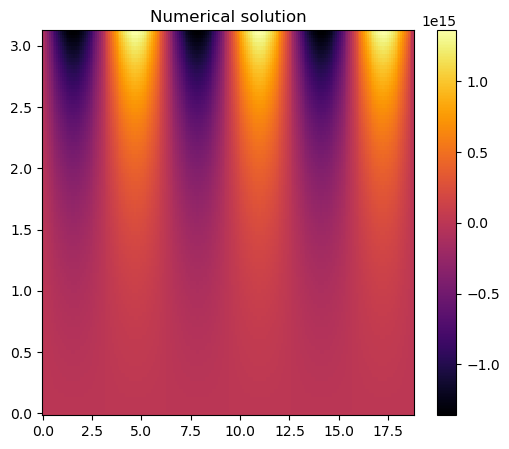

In [55]:
# Plotting

plt.figure(figsize=(6,5))

surf_numer = plt.pcolor(x_2d, y_2d, u_numer, cmap = 'inferno')

plt.colorbar(surf_numer)

plt.title("Numerical solution")

plt.show()

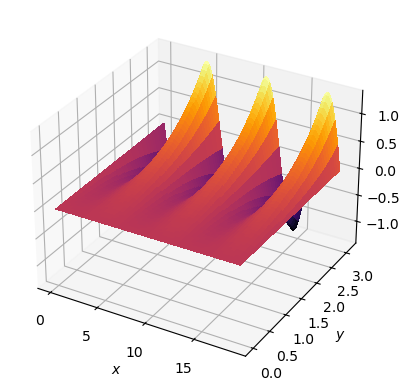

In [56]:
# Plotting
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, u_numer, cmap = 'inferno', linewidth=0, antialiased=False)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

## Error calculation/map:

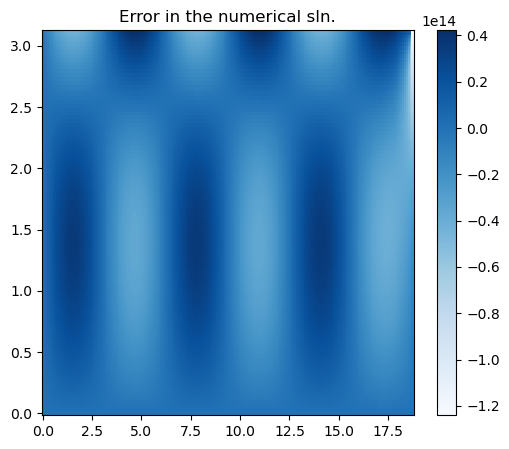

In [57]:
# Plotting

plt.figure(figsize=(6,5))

surf_err = plt.pcolor(x_2d, y_2d, u_numer - u_exact_sln, cmap = 'Blues')

plt.colorbar(surf_err)

plt.title("Error in the numerical sln.")

plt.show()

### $L_2$ norm

$||\epsilon||_2=\frac{1}{N}\sqrt{\sum |u_{numer}-u_{exact}|^2}$

In [58]:
n_value = u_exact_sln.size
err_2 = (1./n_value)*(np.sqrt(np.sum(abs(u_numer - u_exact_sln)**2)))

print(err_2)

137037555496.60843
